<a href="https://colab.research.google.com/github/rebeccadimatteo/FitDiary_FIA/blob/main/regressioneLineare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressione lineare multipla

## Ottenimento del dataset

In [1]:
import pandas as pd
import os
from six.moves import urllib

DOWNLOAD_ROOT="https://raw.githubusercontent.com/rebeccadimatteo/FitDiary_FIA/master/dataset.csv"

def fetch_file_data1(file_url1=DOWNLOAD_ROOT, file_path1="file"):

    os.makedirs(file_path1, exist_ok=True)

    csv_path1 = os.path.join(file_path1, "dataset.csv")

    urllib.request.urlretrieve(file_url1, csv_path1)

fetch_file_data1()

df=pd.read_csv("file/dataset.csv")
df=df[["id", "eta", "mese", "peso", "kcal", "sesso", "pesoStimato"]]
df.head(10)

,id,eta,mese,peso,kcal,sesso,pesoStimato
0,1,46,1,67.00000,2061,0,-0.438622
1,1,46,2,67.43862,1537,0,-1.277814
2,1,46,2,68.71644,3173,0,0.399622
3,1,46,2,68.31682,2684,0,0.281297
4,1,46,2,68.03552,1568,0,-1.225765
5,1,46,2,69.26129,2064,0,-0.937984
6,1,46,2,70.19928,1768,0,-1.347285
7,1,46,2,71.54656,1679,0,-1.076831
8,1,46,2,72.62339,2262,0,-0.448276
9,1,46,2,73.07166,1695,0,-1.614159


## 1)DataCleaning

### Descrizione del dataset

In [2]:
df.describe()

,id,eta,mese,peso,kcal,sesso,pesoStimato
count,36000.000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000
mean,500.500,38.973000,1.972222,93.960686,2854.008639,0.481000,-0.577729
std,288.679,12.283911,0.164338,16.473259,739.296984,0.499646,0.931751
min,1.000,18.000000,1.000000,58.159405,1476.000000,0.000000,-3.196676
25%,250.750,28.000000,2.000000,80.624093,2294.000000,0.000000,-1.165279
50%,500.500,39.000000,2.000000,93.661348,2725.000000,0.000000,-0.487886
75%,750.250,49.000000,2.000000,106.744870,3285.250000,1.000000,0.000000
max,1000.000,59.000000,2.000000,143.593690,6117.000000,1.000000,1.402835


### verifica valori null nel dataset

In [3]:
df.isnull().any()

id             False
eta            False
mese           False
peso           False
kcal           False
sesso          False
pesoStimato    False
dtype: bool

### verifica valori N/A nel dataset

In [4]:
df.isna().any()

id             False
eta            False
mese           False
peso           False
kcal           False
sesso          False
pesoStimato    False
dtype: bool

## 2)Divisione in Training e Test Sets

### 2.1)k-fold e Repeated K-fold

In [12]:
from sklearn.model_selection import RepeatedKFold, KFold
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
#Scelta variabile dipendente (y) e indipendenti (X)
X=df.drop('pesoStimato',1)
y=df.pesoStimato

#stratifiedKFold con 10
kf = KFold(n_splits=10,random_state=1, shuffle=True)
rkf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=1)

#z-Score Normalization Scaler
scaler_StandardScaler = StandardScaler()

#MinMax-Normalization Scaler
scaler_MinMaxScaler = MinMaxScaler()

#selector per Feature selection
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))


for train_index,test_index in kf.split(X,y):
   X_train, X_test = X.iloc[train_index], X.iloc[test_index]
   y_train, y_test = y.iloc[train_index], y.iloc[test_index]
   y_train=y_train.astype('int')
   #feture Scaling StandardScaler sui traing test
   X_train_z = scaler_StandardScaler.fit_transform(X_train)

   #feture Scaling MinMax sui traing test
   X_train_mm = scaler_MinMaxScaler.fit_transform(X_train)

   X_train_z = SelectKBest(f_regression, k=4).fit_transform(X_train_z, y_train)

   X_train_mm = SelectKBest(f_regression, k=4).fit_transform(X_train_mm, y_train)
   

  

  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if __name__ == '__main__':


[[ 0.57339213 -1.63407691 -1.0723443  -0.96136311]
 [ 0.57339213 -1.60748045 -1.78115715 -0.96136311]
 [ 0.57339213 -1.52999769  0.43185397 -0.96136311]
 ...
 [ 0.73628762 -1.15060007 -0.5637305   1.0401897 ]
 [ 0.73628762 -1.09710421 -0.77745651  1.0401897 ]
 [ 0.73628762 -1.01661878 -0.94789624  1.0401897 ]]
[[-1.72975982  0.57520306 -1.63913024 -1.07287681]
 [-1.72975982  0.57520306 -1.61251213 -1.7815223 ]
 [-1.72975982  0.57520306 -1.55921764 -0.23034601]
 ...
 [ 1.72972732  0.73811022 -1.15525975 -0.5643831 ]
 [ 1.72972732  0.73811022 -1.10172033 -0.77805865]
 [ 1.72972732  0.73811022 -1.02116937 -0.94845814]]
[[ 0.57179285 -1.63664217 -1.07148872 -0.96219554]
 [ 0.57179285 -1.61000231 -1.78067888 -0.96219554]
 [ 0.57179285 -1.53239312  0.43351024 -0.96219554]
 ...
 [ 0.73454938 -1.15237641 -0.56260418  1.03928979]
 [ 0.73454938 -1.09879326 -0.77644396  1.03928979]
 [ 0.73454938 -1.0181765  -0.94697442  1.03928979]]
[[-1.73099962  0.56897697 -1.60835866 -1.78060119]
 [-1.73099962

## 3)Feature Scaling

### 3.1)StandardScaler (z-score Normalization)

In [6]:
from sklearn.preprocessing import StandardScaler

scaler_StandardScaler = StandardScaler()

df[df.columns] = scaler_StandardScaler.fit_transform(df.values)
df

,id,eta,mese,peso,kcal,sesso,pesoStimato
0,-1.73032,0.572057,-5.916080,-1.636656,-1.072667,-0.962695,0.149299
1,-1.73032,0.572057,0.169031,-1.610030,-1.781459,-0.962695,-0.751375
2,-1.73032,0.572057,0.169031,-1.532459,0.431485,-0.962695,1.048955
3,-1.73032,0.572057,0.169031,-1.556718,-0.229963,-0.962695,0.921961
4,-1.73032,0.572057,0.169031,-1.573795,-1.739526,-0.962695,-0.695513
...,...,...,...,...,...,...,...
35995,1.73032,0.734874,0.169031,-1.120349,-0.006775,1.038750,0.567316
35996,1.73032,0.734874,0.169031,-1.117366,0.693900,1.038750,1.243549
35997,1.73032,0.734874,0.169031,-1.152632,-0.564069,1.038750,-0.326812
35998,1.73032,0.734874,0.169031,-1.099076,-0.777788,1.038750,-0.804526


## 4)Feature Selction

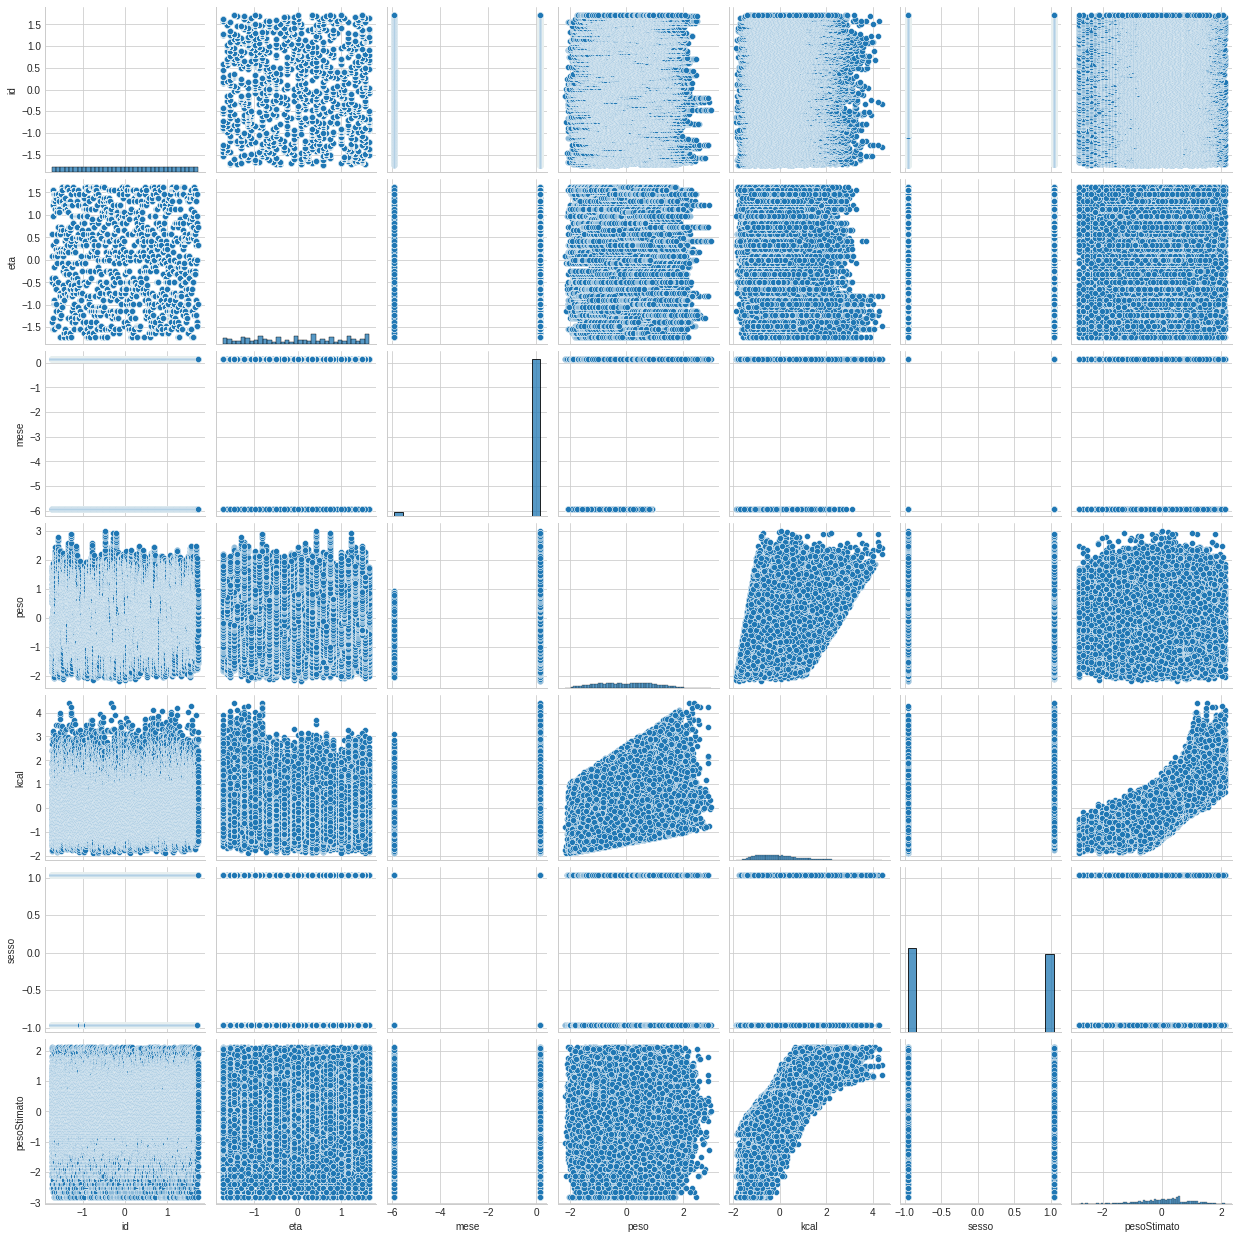

In [7]:
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style

style.use('seaborn-whitegrid')

plt.rcParams['figure.figsize'] = (20,10)

sb.pairplot(df)

plt.savefig('pairplor.png')